<a href="https://colab.research.google.com/github/bahtey101/Credit_Scoring/blob/main/credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задачи кредитного с помощью методов машинного обучения
---
**План работы**
*   подключить необходимые библиотеки,
*   предобработать данные для обучения и тестирования,
*   построить модели,
*   обучить модели на обучающей выборке,
*   провести анализ результатов работы моделей.






## 1. Подключение библиотек


Для простоты работы с данными будем использовать библиотеку **pandas**, предназначенную для хранения, обработки и анализа данных.

In [1]:
import pandas as pd

Для визуализации исходных и полученных данных подключим библиотеку **matplotlib**, с помощью которой можно строить различные двумерные и трехмерные графики.

In [2]:
import matplotlib.pyplot as plt

Подключим модуль **numpy**, который позволяет производить вычисления сразу над массивами чисел.

In [3]:
import numpy as np

Для построения моделей логистической регрессии и ансамбля деревьев решений будем использовать библиотеку **scikit-learn**. Она предоставляет широкий спектр инструментов для разработки и применения различных алгоритмов машинного обучения, включая классификацию, регрессию, кластеризацию, уменьшение размерности, отбор признаков и многое другое. **scikit-learn** также предоставляет удобные средства для предобработки данных, оценки моделей и выбора оптимальных параметров.

Выберем из неё следующее:

*   классификатор дерева решений - **DecisionTreeClassifier**;
*   метод для кросс-валидации - **KFold**;
*   несколько функций для расчёта метрик качества классификации.

In [4]:
# Классификатор дерева решений
from sklearn.tree import DecisionTreeClassifier

# k-fold кросс-валидация
from sklearn.model_selection import KFold

# Метрики качества:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

# Функции для подготовки данных
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Модели логистической регрессии и ансамбля
# деревьев решений
from sklearn import linear_model, ensemble

Для построения и обучения нейронной сети будем использовать библиотеку **Tensorflow**. **Tensorflow** - открытая библиотека для машинного обучения, разработанная для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия.

In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Далее подключим библиотеку **keras**. Она нацелена на оперативную работу с сетями глубинного обучения.

Также нам понадобятся:
*   модель **Sequential**, которая представляет собой линейный стек слоёв;
*   обычный плотно связанный слой - **Dense**;
*   слой активации - **Activation**.



In [6]:
import keras
print(keras.__version__)

# Модель Sequential
from keras.models import Sequential

# Слои Dense и Activation
from keras.layers import Dense, Activation

2.15.0


## 2. Предобработка данных

In [7]:
data = pd.read_csv('/content/sample_data/credit_scoring_data.csv', na_values='nan')

Рассмотрим подробнее данные, которые будем использовать.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,100000.0,0.066860,0.249781,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,100000.0,7.927880,332.391480,0.0,0.030096,0.154426,0.555651,50708.0
age,100000.0,52.240520,14.766519,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,100000.0,0.428220,4.269275,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,100000.0,352.441921,2006.415984,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,80294.0,6642.232222,18122.595836,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,100000.0,8.476040,5.172730,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,100000.0,0.269920,4.243089,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,100000.0,1.017500,1.120146,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,100000.0,0.246040,4.231033,0.0,0.000000,0.000000,0.000000,98.0


Следует отметить, что пропуски встречаются всего в двух столбцах: **MonthlyIncome** и **NumberOfDependents**. Пропуски в них логичнее всего заполнить 0.

In [9]:
data.fillna(0., inplace=True)

Наша задача спрогнозировать дефолт, поэтому **целевая переменная - наличие дефолта**. В нашем случае целевой признак **SeriousDlqin2yrs** - это наличие серьёзной просрочки по платежу за последние 2 года.

Запишем столбец со значениями ключевой переменной в `target_values` и остальные данные запишем в `values`.

In [10]:
target_values = data.iloc[:,0].values
values = data.iloc[:,1:].values

Нормализуем данные.

In [11]:
values = MinMaxScaler().fit_transform(values)

Наконец, **разделим набор данных на обучающую и тестовую выборки**.

In [12]:
training_data, test_data, training_target_data, test_target_data = train_test_split(
    values,
    target_values,
    test_size=0.2,
    random_state=0
)

## 3. Построение моделей

### 3. A. Логистическая регрессия
Построение начнём со статистических моделей: логистической регрессии и ансамбля деревьев решений. Первой будет **модель логистической регрессии**.

In [13]:
logistic_regression_model = linear_model.LogisticRegression(
    max_iter=500
)

### 3. B. Случайный лес
Далее **создадим модель случайного леса**. У него есть множество параметров, наиболее важными из которых являются:
*   `n_estimators` - количество деревьев в лесу,
*   `max_depth` - максимальная глубина у дерева,
*   `min_samples_leaf` - максимальное число объектов, которые могут попасть в лист дерева.



In [14]:
random_forest_model = ensemble.RandomForestClassifier(
    n_estimators=50
)

### 3. C. Нейронная сеть
Теперь переходим к **созданию нейронной сети**. Объявим скрытые слои и количество нейронов в каждом из них.


In [15]:
# Количество входных параметров
in_neurons = training_data.shape[1]
# Количество выходных данных
out_neurons = 1

# Объявление количества нейронов в каждом из слоёв
hidden_layers = [100, 125, 100]

Объявим модель и добавим первый слой: `InputLayer`.

In [16]:
# Объявление модели
neural_network = Sequential()

# Добавление входного слоя
neural_network.add(keras.layers.InputLayer(input_shape=(in_neurons,)))

В качестве функции активации для скрытых слоёв будем использовать **ReLU (Rectified Linear Unit)**. Она преобразует отрицательное входное значение в 0 и сохраняет его при положительном значении.

In [17]:
for hidden_layer in hidden_layers:
  neural_network.add(Dense(units=hidden_layer, activation='relu'))

В выходном слое в качестве функции активации будем использовать **Sigmoid**. **Формула активации сигмоида**:

*sigmoid(x) = 1 / (1 + exp(-x)).*

Так как её выход находится в диапазоне от 0 до 1, она идеально подходит для выходного слоя, чтобы получить результат в виде вероятности для двоичной классификации.



In [18]:
neural_network.add(Dense(units=out_neurons, activation='sigmoid'))

Проверим всё ли прошло успешно.

In [19]:
print(neural_network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 125)               12625     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 26426 (103.23 KB)
Trainable params: 26426 (103.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Скомпилируем объявленную модель.** Для этого будем использовать следующие параметры функции `compile`:
*   `loss` - функция потерь;
*   `optimizer` - оптимизатор алгоритма градиентного спуска;
*   `metrics` - список метрик, которые будут посчитаны как во время обучения, так и во время тестирования модели.



In [20]:
neural_network.compile(
    loss='binary_crossentropy',
    optimizer=           'SGD',
    metrics=      ['accuracy']
)

## 4. Обучение моделей

Для обучения статистических моделей используем метод `fit()`, в который в качестве параметров нужно передать обучающую выборку и столбец значений ключевой переменной (в нашем случае: `training_data` и `target_values`):

In [21]:
logistic_regression_model.fit(training_data, training_target_data)

LogisticRegression(max_iter=500)

In [22]:
random_forest_model.fit(training_data, training_target_data)

RandomForestClassifier(n_estimators=50)

Перейдем к обучению нейронной сети. Для этого, аналогично, используем метод `fit()`.

Объявим `checkpoint` и будем сохранять состояния в `neural_network_history` для визуализации процесса обучения.

In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='model_weights.hdf5',
    monitor=            'val_acc',
    verbose=                    0,
    save_weights_only=      False,
    save_best_only=         False,
    mode=                   'max'
)

neural_network_history = neural_network.fit(
    training_data,
    training_target_data,
    validation_data=(test_data, test_target_data),
    batch_size=64,
    callbacks=[checkpoint],
    initial_epoch=0,
    epochs=100
)

Epoch 1/100
1250/1250 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.9324 - val_loss: 0.2420 - val_accuracy: 0.9331
Epoch 2/100
  87/1250 [=>............................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9305

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 4s 3ms/step - loss: 0.2412 - accuracy: 0.9331 - val_loss: 0.2409 - val_accuracy: 0.9331
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2402 - accuracy: 0.9331 - val_loss: 0.2400 - val_accuracy: 0.9331
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 0.2393 - accuracy: 0.9331 - val_loss: 0.2390 - val_accuracy: 0.9331
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2383 - accuracy: 0.9331 - val_loss: 0.2382 - val_accuracy: 0.9331
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9331 - val_loss: 0.2375 - val_accuracy: 0.9331
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9331 - val_loss: 0.2372 - val_accuracy: 0.9331
Epoch 8/100
1250/1250 [==============================] - 4s 4ms/step - loss: 0.2362 - accuracy: 0.9331 - val_loss: 0.2365 - val_accuracy: 0.93

В результате получаем:

In [24]:
final_loss, final_accuracy = neural_network.evaluate(
    test_data,
    test_target_data,
    verbose=0
)

print('Final Loss:    ',     final_loss)
print('Final Accuracy:', final_accuracy)

Final Loss:     0.19212022423744202
Final Accuracy: 0.9366999864578247


## 5. Анализ результатов

Сначала получим прогнозы с помощью полученных моделей. Для этого для обеих моделей запустим метод `predict()`.

In [25]:
logistic_regression_prediction = logistic_regression_model.predict(test_data)

In [26]:
random_forest_prediction = random_forest_model.predict(test_data)

In [27]:
neural_network_proba = neural_network.predict(test_data)
neural_network_prediction = (neural_network_proba > 0.3)

625/625 [==============================] - 1s 2ms/step


Теперь, с помощью метода `accuracy_score() ` **рассчитаем точность** работы каждой модели, сравнив полученные результаты с настоящими.

In [28]:
print('Accuracy score:')
print('1. Logistic regression:', accuracy_score(test_target_data, logistic_regression_prediction))
print('2. Random forest:      ', accuracy_score(test_target_data,       random_forest_prediction))
print('3. Neural network:     ', accuracy_score(test_target_data,      neural_network_prediction))

Accuracy score:
1. Logistic regression: 0.93325
2. Random forest:       0.98625
3. Neural network:      0.93185


**Рассмотрим таблицу сопряжённости** каждой модели.

In [29]:
# Построение таблицы споряжённости для модели
# логистической регрессии
logistic_regression_confusion_matrix = confusion_matrix(
    test_target_data,
    logistic_regression_prediction
)

logistic_regression_confusion_matrix = pd.DataFrame(
    logistic_regression_confusion_matrix
)

logistic_regression_confusion_matrix

,0,1
0,18645,18
1,1317,20


In [30]:
# Построение таблицы споряжённости для модели
# случайного леса
random_forest_confusion_matrix = confusion_matrix(
    test_target_data,
    random_forest_prediction
)

random_forest_confusion_matrix = pd.DataFrame(
    random_forest_confusion_matrix
)

random_forest_confusion_matrix

,0,1
0,18609,54
1,221,1116


In [31]:
# Построение таблицы споряжённости для модели
# нейронной сети
neural_network_confusion_matrix = confusion_matrix(
    test_target_data,
    neural_network_prediction
)

neural_network_confusion_matrix = pd.DataFrame(
    neural_network_confusion_matrix
)

neural_network_confusion_matrix

,0,1
0,18231,432
1,931,406


Следует обратить внимание, что **модели логистической регрессии и нейронной сети склонны ошибочно определять "плохого" клиента как "хорошего"**. Построим, для наглядности, диаграммы для обеих моделей.

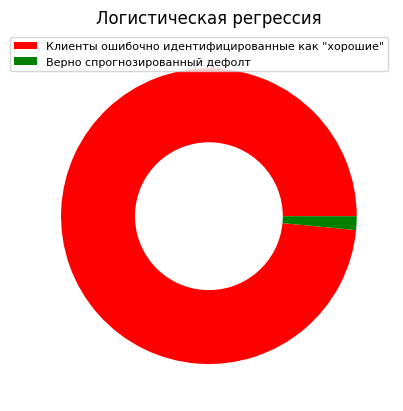

In [32]:
plt.pie(logistic_regression_confusion_matrix.iloc[1],
        colors=['r', 'g'], wedgeprops=dict(width=0.5))

plt.legend(['Клиенты ошибочно идентифицированные как "хорошие"',
            'Верно спрогнозированный дефолт'], prop={'size': 8})

plt.title('Логистическая регрессия')

plt.show()

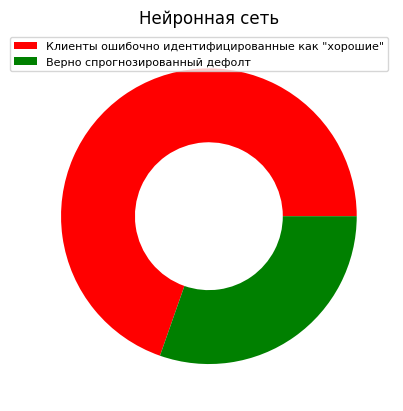

In [33]:
plt.pie(neural_network_confusion_matrix.iloc[1],
        colors=['r', 'g'], wedgeprops=dict(width=0.5))

plt.legend(['Клиенты ошибочно идентифицированные как "хорошие"',
            'Верно спрогнозированный дефолт'], prop={'size': 8})

plt.title('Нейронная сеть')

plt.show()

Скорее всего, данная проблема вызвана тем, что в обучающей выборке "хороших" клиентов много больше чем "плохих". Несмотря на это, модель случайного леса показала очень хороший результат. Визуализируем и его.

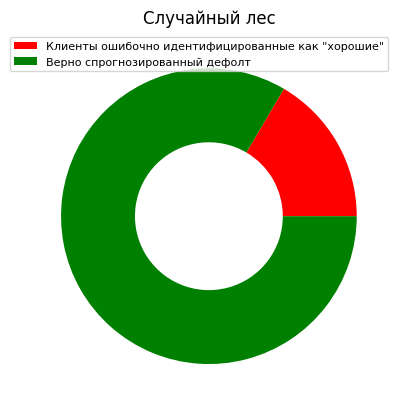

In [34]:
plt.pie(random_forest_confusion_matrix.iloc[1],
        colors=['r', 'g'], wedgeprops=dict(width=0.5))

plt.legend(['Клиенты ошибочно идентифицированные как "хорошие"',
            'Верно спрогнозированный дефолт'], prop={'size': 8})

plt.title('Случайный лес')

plt.show()

Далее сравним результаты работы моделей с помощью **ROC-метрики**. Для этого, сначала, вместо прогноза меток классов у статистических моделей получим с помощью метода `predict_proba()` метки вероятности принадлежности к классам.

In [35]:
logistic_regression_proba = logistic_regression_model.predict_proba(test_data)[:,1]

In [36]:
random_forest_proba = random_forest_model.predict_proba(test_data)[:,1]

Функция `roc_curve()` из **scikit-learn** позволяет получить координаты точек ROC кривой, а также значения порога **threshold**, при котором достигается соответствующие значения метрик **FPR** и **TPR**.

На вход функции `roc_curve()` необходимо передать два аргумента:
* истинные значения меток - `test_values`;
* вероятности, предсказанные моделью.

Начнём с модели логистической регрессии.

In [37]:
FPR, TPR, threshold = roc_curve(test_target_data, logistic_regression_proba)

print(
    'Площадь под ROC-кривой:',
    roc_auc_score(test_target_data, logistic_regression_proba)
)

Площадь под ROC-кривой: 0.6662909517713925


Объявим функцию, которая будет строить ROC-кривую.

In [38]:
def plot_ROC(FPR, TPR, threshold, title):
    # создаём график
    plt.figure(figsize=(5, 5))

    # строим кривую
    plt.plot(FPR, TPR, label='Сглаженные значения ROC-AUC')

    # кривая, соответствующая случайному угадыванию
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':',
            label='Модель, выдающая случайное значение')

    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.fill_between(FPR, TPR, step="mid", alpha=0.4,
                    label='Площадь под кривой (ROC-AUC)')
    plt.legend()
    plt.show()

Построим кривую для модели линейной регрессии.

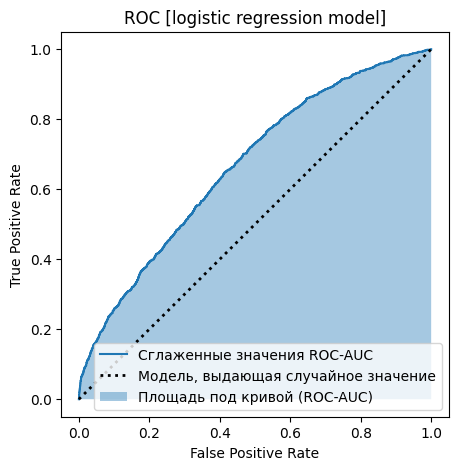

In [39]:
plot_ROC(FPR, TPR, threshold, 'ROC [logistic regression model]')

Повторим те же действия для остальных моделей.


In [40]:
# Для модели случайного леса
FPR, TPR, threshold = roc_curve(test_target_data, random_forest_proba)

print(
    'Площадь под ROC-кривой:',
    roc_auc_score(test_target_data, random_forest_proba)
)

Площадь под ROC-кривой: 0.9741335824152766


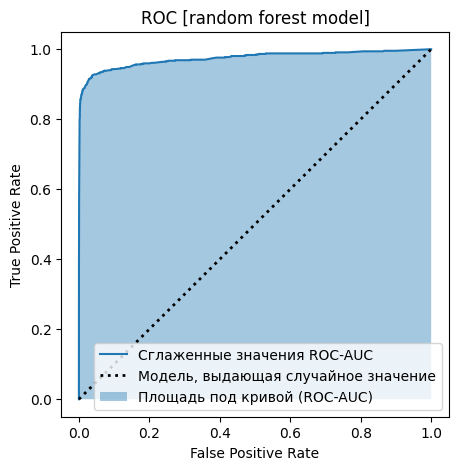

In [41]:
plot_ROC(FPR, TPR, threshold, 'ROC [random forest model]')

In [42]:
# Для модели нейронной сети
FPR, TPR, threshold = roc_curve(test_target_data, neural_network_proba)

print(
    'Площадь под ROC-кривой:',
    roc_auc_score(test_target_data, neural_network_proba)
)

Площадь под ROC-кривой: 0.8212662124984937


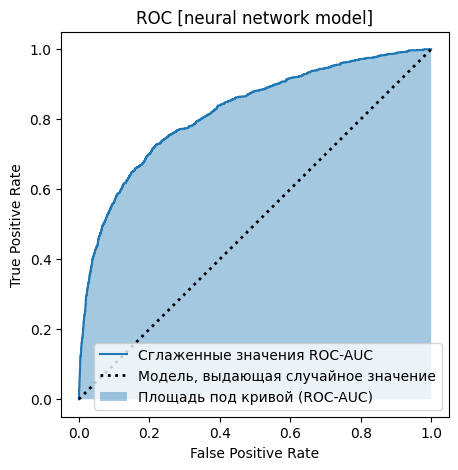

In [43]:
plot_ROC(FPR, TPR, threshold, 'ROC [neural network model]')

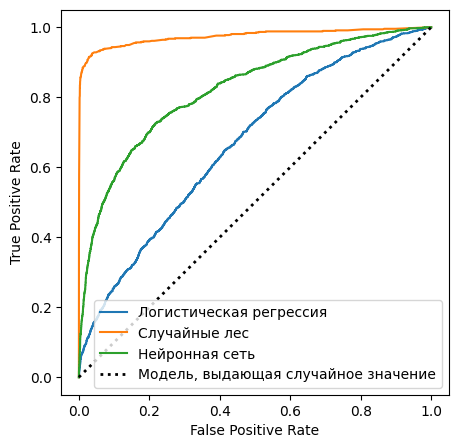

In [44]:
# создаём график
plt.figure(figsize=(5, 5))

# строим кривые
FPR, TPR, _ = roc_curve(test_target_data, logistic_regression_proba)
plt.plot(FPR, TPR, label='Логистическая регрессия')

FPR, TPR, _ = roc_curve(test_target_data, random_forest_proba)
plt.plot(FPR, TPR, label='Случайные лес')

FPR, TPR, _ = roc_curve(test_target_data, neural_network_proba)
plt.plot(FPR, TPR, label='Нейронная сеть')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':',
         label='Модель, выдающая случайное значение')

#plt.title()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

Вычислим **точность**, **полноту** и **F1-меру** для каждой модели.

Для этого объявим следующую функцию.

In [45]:
def evaluate_all(test_target_data, predictions):
  conf_matrix = confusion_matrix(test_target_data, predictions)

  TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
  FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]

  # Точность
  precision = TP / (TP + FP)
  print("Точность: %.2f%%" % (100 * precision))

  # Полнота
  recall = TP / (TP + FN)
  print("Полнота:  %.2f%%" % (100 * recall))

  # F1-мера
  F1_score = 2 * precision * recall / (precision + recall)
  print("F1-мера:", F1_score)

Теперь выозовем эту функцию, передав туда предсказанные значения каждой модели. Начнём с логистической регрессии.

In [46]:
print('Оценка модели логистической регрессии:')

evaluate_all(test_target_data, logistic_regression_prediction)

Оценка модели логистической регрессии:
Точность: 52.63%
Полнота:  1.50%
F1-мера: 0.029090909090909094


In [47]:
print('Оценка модели случайного леса:')

evaluate_all(test_target_data, random_forest_prediction)

Оценка модели случайного леса:
Точность: 95.38%
Полнота:  83.47%
F1-мера: 0.8903071400079776


In [48]:
print('Оценка модели нейронной сети:')

evaluate_all(test_target_data, neural_network_prediction)

Оценка модели нейронной сети:
Точность: 48.45%
Полнота:  30.37%
F1-мера: 0.37333333333333335
